In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [29]:
df = pd.read_csv('bank-additional-full.csv', sep=';')


In [30]:
df.drop('duration', axis=1, inplace=True)  # Duration isn't known before contact


In [31]:
# Label Encoding for binary and categorical columns
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le


In [32]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

Accuracy: 0.8970623937848993

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.61      0.26      0.36       935

    accuracy                           0.90      8238
   macro avg       0.76      0.62      0.65      8238
weighted avg       0.88      0.90      0.88      8238



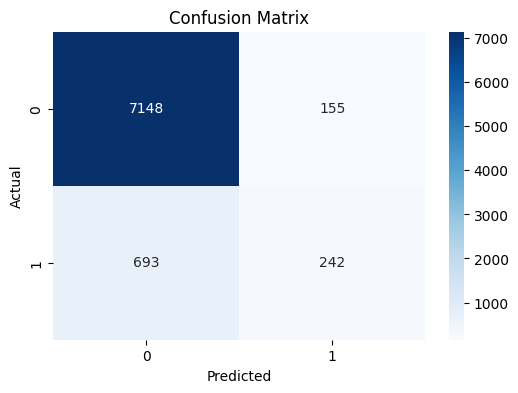

In [34]:
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


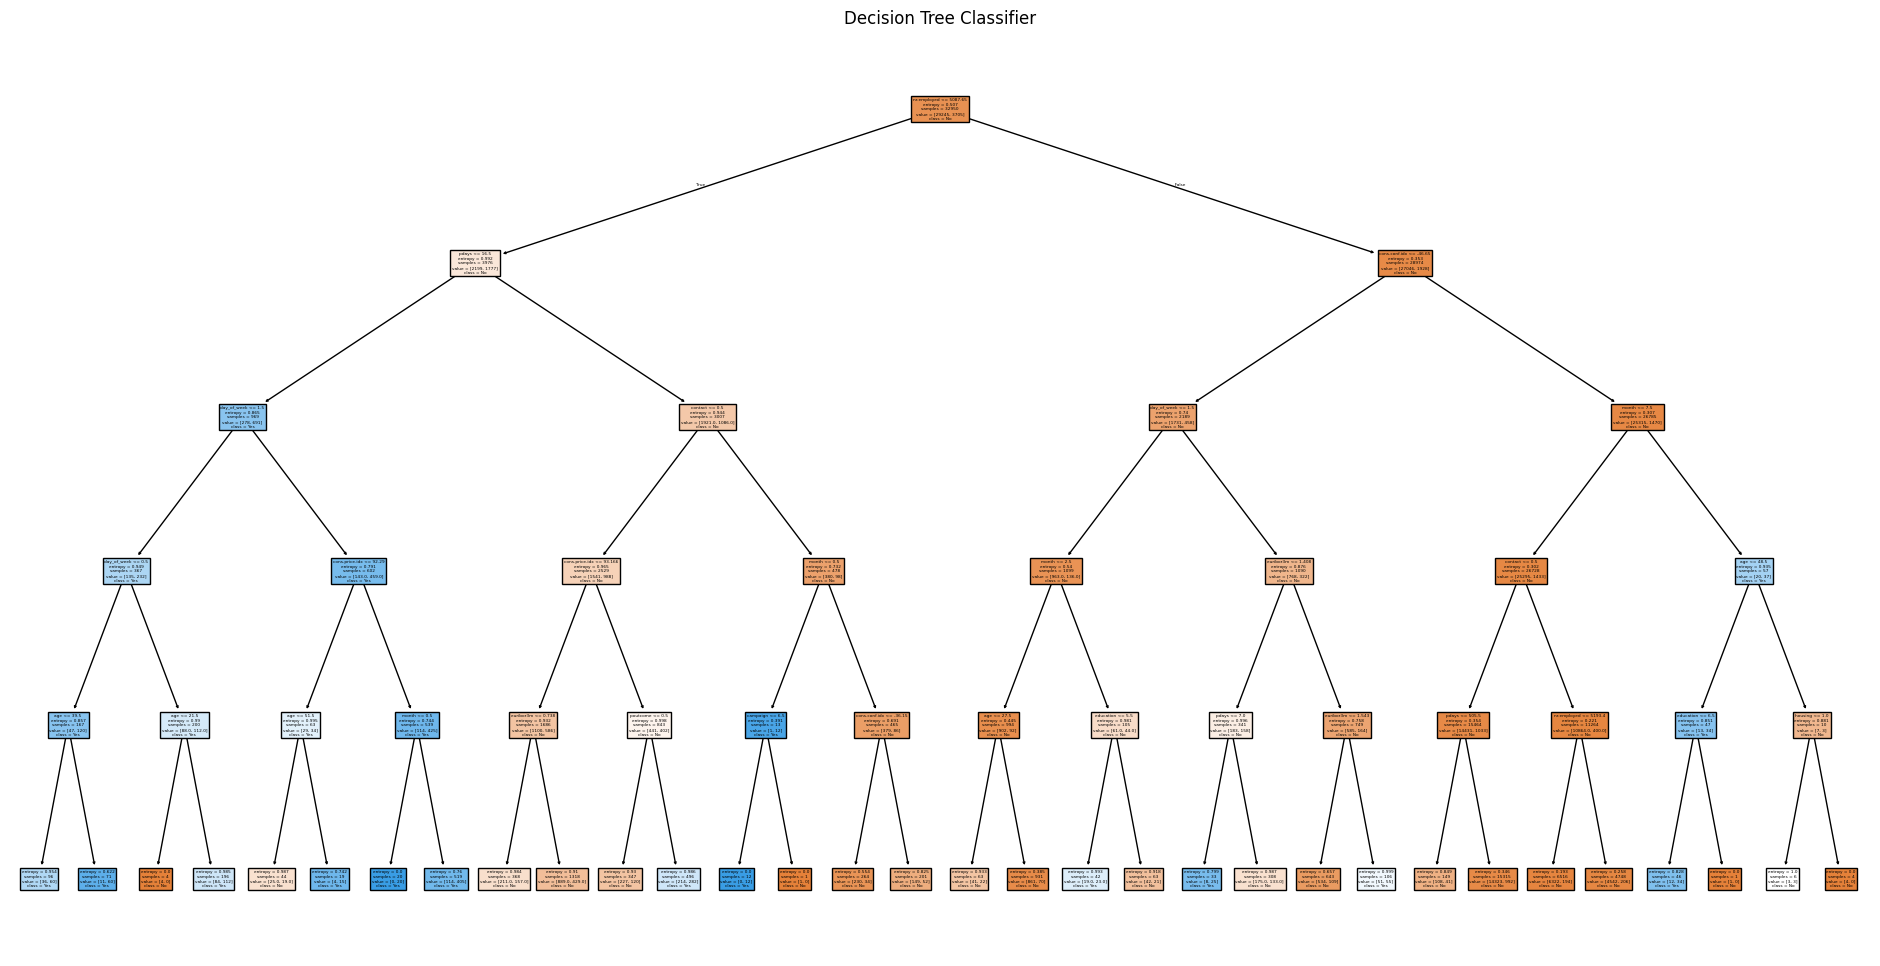

In [35]:
plt.figure(figsize=(24, 12))
plot_tree(dt, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree Classifier')
plt.show()
